In [1]:
#          User                       Games
#|-------------------------|----------------------------------|
#| U1                      | GTAV, Red Dead Redemption 2      |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U2                      | Cities Skylines, SimCity         |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U3                      | GTA V                            |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U4                      | Cities Skylines, GTA V           |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U5                      | GTA V, Factorio                  |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U6                      | Cities Skylines, Factorio        |
#|-------------------------|----------------------------------|
#|-------------------------|----------------------------------|
#| U7                      | GTA V, Cities Skylines, Factorio |
#|-------------------------|----------------------------------|

In [2]:
#          Item                       Frequency                             Support
#|-------------------------|----------------------------------|----------------------------------|
#| GTA V                   |              5/7                 |                0.714             |
#|-------------------------|----------------------------------|----------------------------------|
#|-------------------------|----------------------------------|----------------------------------|
#| Red Dead Redemption 2   |              1/7                 |                0.142             |
#|-------------------------|----------------------------------|----------------------------------|
#|-------------------------|----------------------------------|----------------------------------|
#| Cities Skylines         |              4/7                 |                0.571             |
#|-------------------------|----------------------------------|----------------------------------|
#|-------------------------|----------------------------------|----------------------------------|
#| SimCity                 |              1/7                 |                0.142             |
#|-------------------------|----------------------------------|----------------------------------|
#|-------------------------|----------------------------------|----------------------------------|
#| Factorio                |              3/7                 |                0.428             |
#|-------------------------|----------------------------------|----------------------------------|

In [3]:
#                 Item                                      Frequency                             Support
#|----------------------------------------------|----------------------------------|----------------------------------|
#| GTA V,Red Dead Redemption 2                  |              1/7                 |                0.142             |
#|----------------------------------------------|----------------------------------|----------------------------------|
#|----------------------------------------------|----------------------------------|----------------------------------|
#| GTA V, Cities Skylines                       |              2/7                 |                0.285             |
#|----------------------------------------------|----------------------------------|----------------------------------|
#|----------------------------------------------|----------------------------------|----------------------------------|
#| GTA V, Factorio                              |              2/7                 |                0.285             |
#|----------------------------------------------|----------------------------------|----------------------------------|
#|----------------------------------------------|----------------------------------|----------------------------------|
#| Cities Skylines, SimCity                     |              1/7                 |                0.142             |
#|----------------------------------------------|----------------------------------|----------------------------------|
#|----------------------------------------------|----------------------------------|----------------------------------|
#| Cities Skylines,Factorio                     |              2/7                 |                0.285             |
#|----------------------------------------------|----------------------------------|----------------------------------|
#|----------------------------------------------|----------------------------------|----------------------------------|
#| GTA V, Cities Skylines, Factorio             |              1/7                 |                0.142             |
#|----------------------------------------------|----------------------------------|----------------------------------|

In [4]:
#                 Rule                    Support               Confidence                     Improvement
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#| Red Dead Redemption 2 > GTA V        |  0.142  |                 1                |              1.4               |
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#| Cities Skylines > GTA V              |  0.285  |                0.49              |              0.69              |
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#| Factorio  > GTA V                    |  0.285  |                0.66              |              0.93              |
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#|--------------------------------------|---------|----------------------------------|--------------------------------|
#| Cities Skylines, Factorio > GTA V    |  0.142  |                0.49              |              0.69              |
#|--------------------------------------|---------|----------------------------------|--------------------------------|

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree as tree
from sklearn.metrics import accuracy_score

In [6]:
iris_dataset = datasets.load_iris()
irisDF = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
irisx = irisDF.copy()
irisx = irisx.drop(columns=['target'])
irisx



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
irisy = irisDF['target']
irisy

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(irisx, irisy, test_size=0.30, shuffle = True)

In [10]:
print("Training (x) is ",len(X_train))
print("Training (y) is ",len(y_train))
print("Testing (x) is ",len(X_test))
print("Testing (y) is ",len(y_test))

Training (x) is  105
Training (y) is  105
Testing (x) is  45
Testing (y) is  45


In [11]:
Model = tree.DecisionTreeClassifier(max_depth = 3,class_weight = "balanced")

In [12]:
Model = Model.fit(X_train, y_train)

[Text(418.5, 951.3000000000001, 'petal length (cm) <= 2.6\ngini = 0.667\nsamples = 105\nvalue = [35.0, 35.0, 35.0]'),
 Text(279.0, 679.5, 'gini = 0.0\nsamples = 33\nvalue = [35.0, 0.0, 0.0]'),
 Text(558.0, 679.5, 'petal length (cm) <= 4.85\ngini = 0.5\nsamples = 72\nvalue = [0.0, 35.0, 35.0]'),
 Text(279.0, 407.70000000000005, 'petal width (cm) <= 1.7\ngini = 0.059\nsamples = 39\nvalue = [0.0, 34.103, 1.061]'),
 Text(139.5, 135.89999999999998, 'gini = 0.0\nsamples = 37\nvalue = [0.0, 33.205, 0.0]'),
 Text(418.5, 135.89999999999998, 'gini = 0.497\nsamples = 2\nvalue = [0.0, 0.897, 1.061]'),
 Text(837.0, 407.70000000000005, 'petal length (cm) <= 4.95\ngini = 0.05\nsamples = 33\nvalue = [0.0, 0.897, 33.939]'),
 Text(697.5, 135.89999999999998, 'gini = 0.418\nsamples = 3\nvalue = [0.0, 0.897, 2.121]'),
 Text(976.5, 135.89999999999998, 'gini = 0.0\nsamples = 30\nvalue = [0.0, 0.0, 31.818]')]

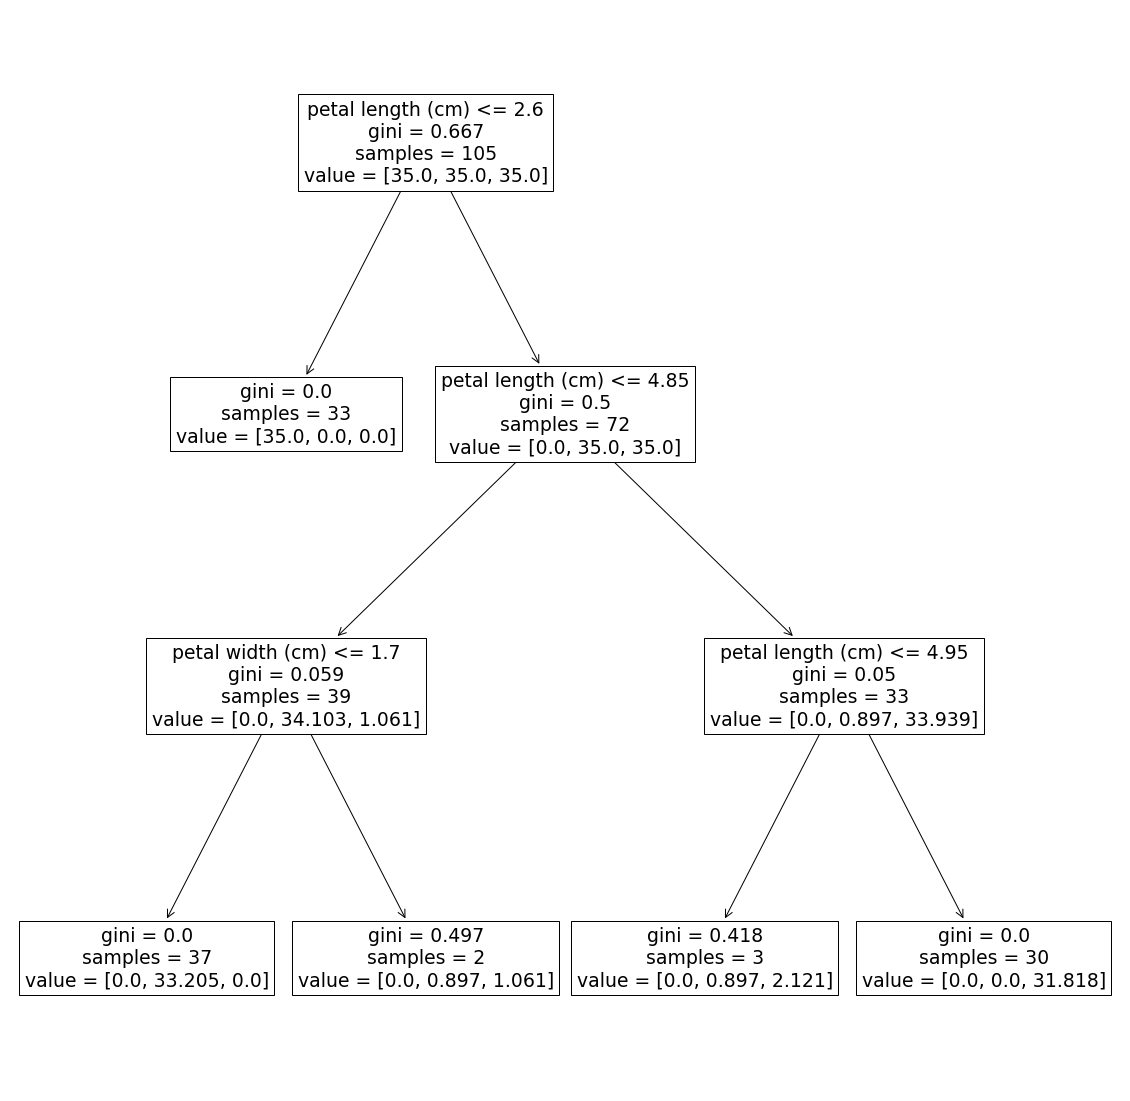

In [13]:
plt.rcParams["figure.figsize"] = (20,20)

plot_tree(Model,feature_names = iris_dataset['feature_names']+ ['target'])

In [14]:
xPredict = Model.predict(X_test)
treeaccuracy= accuracy_score(y_test,xPredict,normalize = True)
print("%0.2f"%treeaccuracy)


0.93


In [15]:
y_test.ravel()

array([0., 1., 1., 0., 1., 0., 2., 2., 2., 0., 2., 0., 2., 2., 1., 0., 2.,
       0., 0., 2., 2., 1., 0., 2., 1., 2., 2., 2., 2., 0., 0., 1., 1., 1.,
       2., 2., 1., 0., 1., 0., 0., 2., 0., 0., 0.])

In [16]:
#Code taken and editied from here(https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html) added to make confusion matrixes look better and clearer than the standard array format


classes = ["0","1","2"] #set clasess for data analysing 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title: #sets title of confustion matrix if there isnt one
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # set confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data bhased on the set class data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[17  0  0]
 [ 0  8  3]
 [ 0  0 17]]


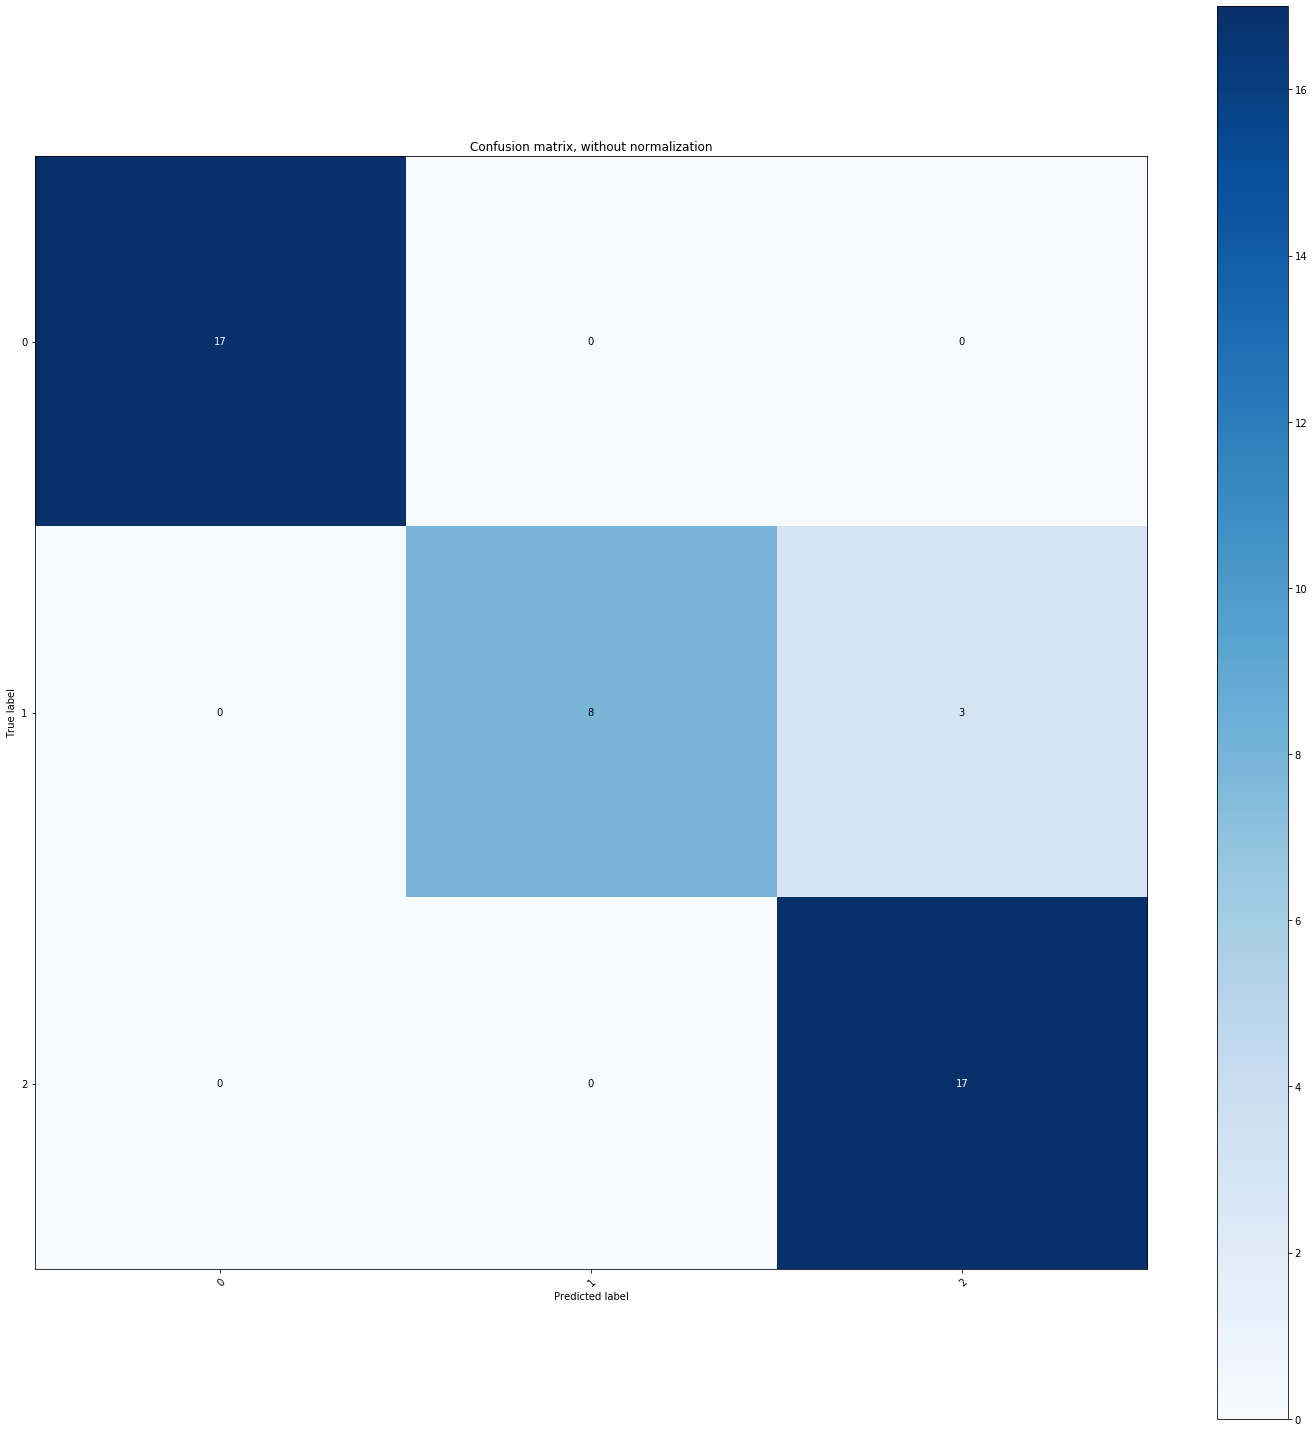

In [17]:
plot_confusion_matrix(y_test, xPredict, classes=classes, title='Confusion matrix, without normalization')

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.72727273 0.27272727]
 [0.         0.         1.        ]]


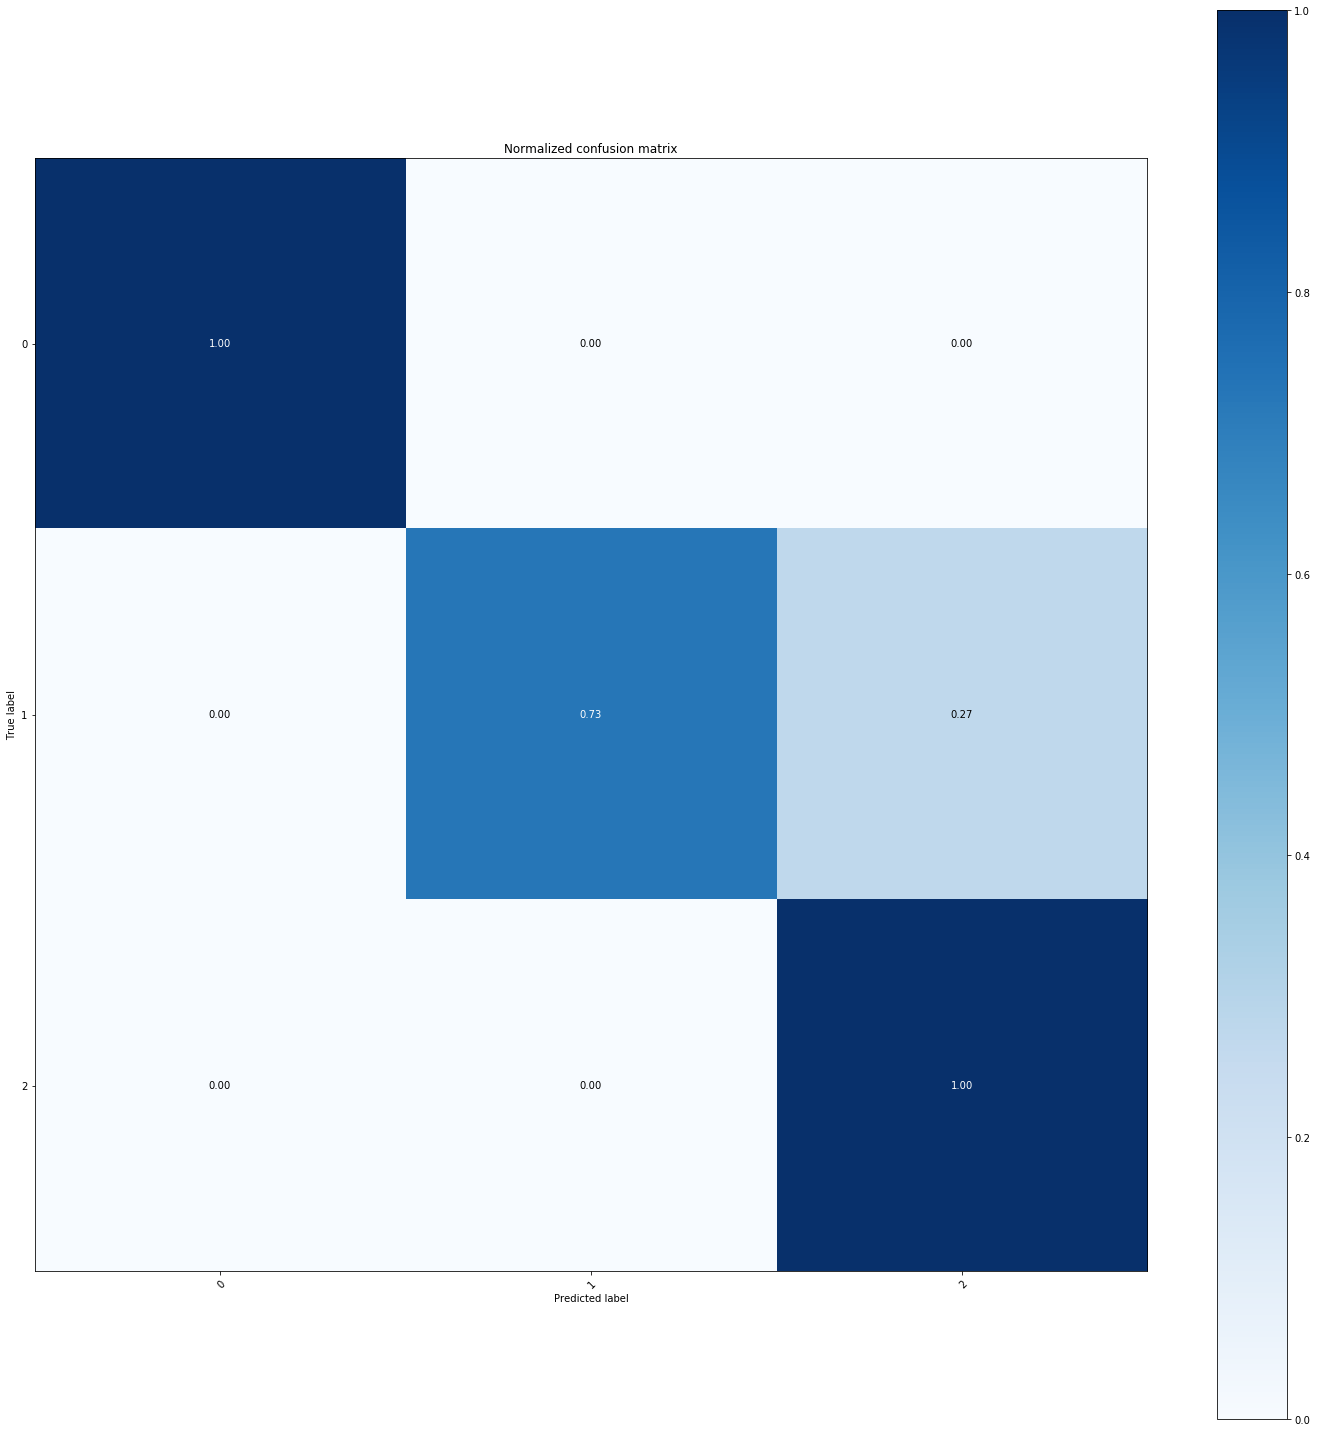

In [18]:
plot_confusion_matrix(y_test, xPredict, classes=classes, normalize=True, title='Normalized confusion matrix')